# Iowa Liquor Store Sales Analysis

 - <a href = "https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Products/gckp-fe7r">Dataset 1 </a> (Vendor Information - More than 10,000 observations and 17 variables).
 - <a href = "https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy"> Dataset 2</a> (Seller information - More than 23MM observations and 24 variables).
     - <b>Google BigQuery</b> is utilized to handle large dataset. Appropriate quering is done in the database to generate required information for our analysis. Moreover, memory usage will be minimized by implementing downcasting with python (more on this below).
     
<img src = "https://sales-analysis.s3.amazonaws.com/logan-weaver-USq70OTtGIk-unsplash.jpeg" alt = "Liquor Sales">     

<p> Using both datasets provided by the state of <a href= "https://data.iowa.gov/"> Iowa </a> on liquor sales, several methods of analysis will be applied to provide actionable analysis to investors on ways to minimze expenses and increase profits. Due to the construct of the datase, time series analysis, unsupervised learning, location analysis will the main three modeling techniques that will be used in this research. Afterwards, depending on necessity and applicability, some other models will be used as well. Some additional models to consider; MBA (Market Basket Analysis), supervised learning to predict profits (feature engineered based on sales and expenses per product).</p>


 - For modeling and analysis, refer to <em>models.ipynb</em>.
 - For created functions, refer to <em>utility.py</em>.
      - To understand the utility of a function and its parameters/methods, run the following code in your IDE <br>
      <code> print(<i>function_name</i>.\__doc__ </code>  <br>or <br>
      <code> print(help(<i>function_name</i>))
 - For dependencies and necessary libraries, refer to <em>requirements.txt</em>.
     - To download dependencies, access the appropriate directory and run the following code: <code> pip install -r requirements.txt </code>
 - To learn more about me, make sure to connect on <a href = "linkedin.com/in/tigran-vardanyan-"> linkedin! </a>


### Importing Necessary Libraries

 - <b>Pandas </b> 
     - <i>Data analysis/wrangling</i>
 - <b>NumPy</b>  
     - <i>Mathematical Functions</i>
 - <b>Matplotlib/Seaborn/Plotly </b>  
     - <i> Data Visualization</i>
 - <b>re</b> 
    - <i> Regular Expressions - Data Information Extraction</i>
 - <b>Datetime</b> 
    - <i> Creating datetime objects.</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import re
from datetime import datetime

In [2]:
# Setting parameters for graphs.
pd.set_option("display.max_columns", 999)
plt.rcParams["figure.figsize"] = (20,10)


### System Configuration

In [90]:
! pwd


/Users/tiko/Documents/Iowa_Liquor_Sales_Analysis/Tigran_V


In [94]:
! ls

Exploratory_Analysis.ipynb requirements.txt
bigQuery.py


In [92]:
! cd /..

In [93]:
!pwd


/Users/tiko/Documents/Iowa_Liquor_Sales_Analysis/Tigran_V


## Exploring Smaller Dataset 1 For Vendor Information.

In [ ]:
vendors_DF = pd.read_csv("../Iowa_Liquor_Products.csv")

In [ ]:
vendors_DF.head()

In [ ]:
vendors_DF.info()

In [ ]:
vendors_DF.describe()

In [ ]:
vendors_DF.columns = vendors_DF.columns.str.replace(" ","") #Making column names more readable for pandas

In [ ]:
vendors_DF.head()

### Variable Data Types and Data Description:

<p> This dataset provides a list of liquor products maintained by the Iowa Alcoholic Beverages Division. 
Data is updated monthly. Updates are typically <a href = "https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Products/gckp-fe7r"> available </a> first of the month.</p>



 
 
 <b>- Numeric:</b>
 
   - <i> Vendor </i>
   - <i> BottleVolume(ml) </i>
   - <i> Pack </i>
   - <i> InnerPack </i>
   - <i> Age </i>
   - <i> Proof </i>
   - <i> UPC </i>
   - <i> SCC </i>
   - <i> InnerPack </i>
   - <i> StateBottleCost </i>
   - <i> StateBottleRetail </i>
   - <i> ReportDate </i>
   
 <b>- Object:</b> 
 
   - <i> ItemNumber </i>
   - <i> CategoryName </i>
   - <i> ItemDescription </i>
   - <i> VendorName </i>

 <b>- DateTime Object:</b>
   - <i> ListDate </i>
   - <i> ReportDate </i>

## Exploring Main Dataset 2 (More than 23MM Observations)

#### Using BigQuery Dataset 

In [3]:
import pyarrow #to convert sql query to pandas DF without the need of iterative functions
from dataclasses import dataclass
from google.cloud import bigquery
import os
import pandas as pd
pd.set_option("display.max_columns",999)

In [4]:

path = '/Users/tiko/Downloads/BQ_cred.json'


os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path

project = 'liquor-store-analysis'
dataset = 'liquor-store-analysis'

client = bigquery.Client(project=project)
df_sql = client.dataset(dataset)

qr = client.query("""

SELECT * FROM 
`liquor-store-analysis.Liquor_Dataset.TABLE1`
WHERE date >= '2020-03-01'AND date <='2021-02-28'
ORDER BY date
LIMIT 250000;
""")

results = qr.result()


# name_group_query = """
# SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` 
# LIMIT 20 OFFSET 2;
# """

# client.query(name_group_query)

In [ ]:
stores_DF = results.to_dataframe()

In [6]:
stores_DF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-25571300005,2020-03-02,4025,Karam Kaur Khasriya Llc,702 13th St,Belle Plaine,52208.0,POINT (-92.277759 41.897052),6,BENTON,1701100.0,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39
1,INV-25562000026,2020-03-02,5682,Ambysure Inc / Clinton,1641 S Bluff Blvd,Clinton,52732.0,POINT (-90.225022 41.833351),23,CLINTON,1081600.0,Whiskey Liqueur,421,SAZERAC COMPANY INC,86885,Southern Comfort PET,12,750,10.33,15.50,12,186.00,9.0,2.37
2,INV-25566200019,2020-03-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.0,1.58
3,INV-25574100031,2020-03-02,2662,Hy-Vee Wine & Spirits / Muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,POINT (-91.04437 41.426615),70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.0,2.37
4,INV-25546200042,2020-03-02,4829,Central City 2,1501 Michigan Ave,Des Moines,50314.0,POINT (-93.613739 41.60572),77,POLK,1031200.0,American Flavored Vodka,380,Phillips Beverage,41604,UV Grape,12,750,6.50,9.75,36,351.00,27.0,7.13


In [96]:
stores_DF.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  250000 non-null  object 
 1   date                     250000 non-null  object 
 2   store_number             250000 non-null  object 
 3   store_name               250000 non-null  object 
 4   address                  249931 non-null  object 
 5   city                     249931 non-null  object 
 6   zip_code                 249931 non-null  object 
 7   store_location           227199 non-null  object 
 8   county_number            249931 non-null  object 
 9   county                   249931 non-null  object 
 10  category                 249884 non-null  object 
 11  category_name            249884 non-null  object 
 12  vendor_number            250000 non-null  object 
 13  vendor_name              250000 non-null  object 
 14  item

In [97]:
type(stores_DF.store_location)

pandas.core.series.Series

In [7]:
stores_DF.store_location = stores_DF.store_location.str.replace('POINT','').str.replace('(','').str.replace(')','').str.lstrip()




In [98]:
stores_DF.store_name.value_counts().sum()

250000

In [122]:
pd.DataFrame(stores_DF.store_location.str.split(' '))['store_location'][0][0]

'-92.277759'

In [8]:
stores_DF['long'] = stores_DF.store_location.str.split(' ', expand=True)[0]

In [9]:
stores_DF['lat'] = stores_DF.store_location.str.split(' ', expand=True)[1]

In [10]:
stores_DF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat
0,INV-25571300005,2020-03-02,4025,Karam Kaur Khasriya Llc,702 13th St,Belle Plaine,52208.0,-92.277759 41.897052,6,BENTON,1701100.0,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39,-92.277759,41.897052
1,INV-25562000026,2020-03-02,5682,Ambysure Inc / Clinton,1641 S Bluff Blvd,Clinton,52732.0,-90.225022 41.833351,23,CLINTON,1081600.0,Whiskey Liqueur,421,SAZERAC COMPANY INC,86885,Southern Comfort PET,12,750,10.33,15.50,12,186.00,9.0,2.37,-90.225022,41.833351
2,INV-25566200019,2020-03-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.0,1.58,None,None
3,INV-25574100031,2020-03-02,2662,Hy-Vee Wine & Spirits / Muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.0,2.37,-91.04437,41.426615
4,INV-25546200042,2020-03-02,4829,Central City 2,1501 Michigan Ave,Des Moines,50314.0,-93.613739 41.60572,77,POLK,1031200.0,American Flavored Vodka,380,Phillips Beverage,41604,UV Grape,12,750,6.50,9.75,36,351.00,27.0,7.13,-93.613739,41.60572


In [ ]:
stores_DF.info()

In [ ]:
stores_DF.isna().sum().plot.bar();  # How many na values we have 

In [ ]:
stores_DF.info('deep')

In [11]:
stores_DF.date = pd.to_datetime(stores_DF.date)


In [ ]:
stores_DF.info('deep') 
# memory usage: 45.8+ MB --> Since we have a large dataset (7Gib on BigQuery)
# We can downcast some of the numerical datatypes in the dataset to minimize memory usage

In [12]:
sale_per_day['Day'] = sale_per_day.date.dt.day
sale_per_day['Month'] = sale_per_day.date.dt.month
sale_per_day['Year'] = sale_per_day.date.dt.year

NameError: name 'sale_per_day' is not defined

In [ ]:
sale_per_day = stores_DF.groupby(['Month'])[['sale_dollars']].sum().reset_index()

In [ ]:
sale_per_day

In [13]:
sns.lineplot(x = sale_per_day.date.dt.month, y = sale_per_day.sale_dollars)

NameError: name 'sale_per_day' is not defined

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(sale_per_day.set_index('date'))

In [ ]:
float_cols = df.select_dtypes('float').columns
integer_cols = df.select_dtypes('integer').columns

df[float_cols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[integer_cols] = df[icols].apply(pd.to_numeric, downcast='integer')

In [ ]:
gg =stores_DF.groupby(['store_number','store_name']).size().reset_index()

In [ ]:
gg.to_gbq(destination_table='Liquor_Dataset.Table4', project_id='liquor-store-analysis')

In [ ]:
gg.rename(columns=
         {0: 'Count'},inplace=True)

In [ ]:
gg.sort_values(by='Count', ascending=False).head(30)

In [ ]:
pd.DataFrame(gg[gg.store_name.str.contains('Hy-Vee')].sort_values(by='Count', ascending=False)['store_name'].value_counts())

In [ ]:
# globals.clear()

In [ ]:
stores_DF[stores_DF.store_name.str.contains('Hy')].shape #74,623 observations for Hy-Vee stores

In [14]:
stores_DF.drop('store_location', axis = 1, inplace = True)

In [ ]:
stores_DF.head()

In [13]:
stores_DF.store_name = stores_DF.store_name.apply(str.lower)

In [14]:
hyveeDF = stores_DF[stores_DF.store_name.str.contains('hy-vee')]

In [15]:
hyveeDF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat
2,INV-25566200019,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.00,1.58,None,None
3,INV-25574100031,2020-03-02,2662,hy-vee wine & spirits / muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.00,2.37,-91.04437,41.426615
11,INV-25558700086,2020-03-02,2539,hy-vee food store / iowa falls,640 S. Oak,Iowa Falls,50126.0,-93.262364 42.508752,42,HARDIN,1012400.0,Irish Whiskies,395,PROXIMO,15830,Proper No. Twelve,12,750,14.00,21.00,1,21.00,0.75,0.19,-93.262364,42.508752
13,INV-25566100001,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,370,PERNOD RICARD USA,15856,Redbreast 12YR,6,750,33.48,50.22,12,602.64,9.00,2.37,None,None
14,INV-25570000122,2020-03-02,2508,hy-vee food store #1 / cedar rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,-91.697941 41.97447,57,LINN,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,1,11.03,0.05,0.01,-91.697941,41.97447


In [ ]:
hyveeDF.isna().sum()

In [18]:
print("Based on our new column, indicating store type, we have the following breakdown:"+"\n")

print(hyveeDF.StoreType.value_counts())

Based on our new column, indicating store type, we have the following breakdown:

Supermarket          54027
Liquor Store         14898
Drug Store            9507
Fast & Fresh          1197
Gas Station             81
Convenience Store       69
Name: StoreType, dtype: int64


In [ ]:
hyveeDF[hyveeDF.StoreType == 'Convenience Store'].sample(20)
    

In [17]:
hyveeDF.sample(10)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType
393,INV-25553800092,2020-03-02,2512,hy-vee wine and spirits / iowa city,1720 Waterfront Dr,Iowa City,52240.0,-91.53046300000001 41.642764,52,JOHNSON,1042100.0,Imported Dry Gins,389,REMY COINTREAU USA INC,28905,The Botanist Islay Dry Gin,6,750,20.48,30.72,12,368.64,9.00,2.37,-91.53046300000001,41.642764,Liquor Store
23273,INV-25621800145,2020-03-04,2565,hy-vee food store #1636 / spencer,819 N Grand Ave,Spencer,51301.0,-95.14506 43.145897,21,CLAY,1031200.0,American Flavored Vodka,260,DIAGEO AMERICAS,77637,Smirnoff Cherry,12,750,8.25,12.38,2,24.76,1.50,0.39,-95.14506,43.145897,Supermarket
166047,INV-26073800043,2020-03-24,2660,hy-vee food store / sioux center,1951 S Main Ave,Sioux Center,51250.0,-96.175695 43.056471,84,SIOUX,1071100.0,Cocktails /RTD,434,LUXCO INC,63530,Salvadors Original Margarita PET,6,1750,6.00,9.00,12,108.00,21.00,5.54,-96.175695,43.056471,Supermarket
150409,INV-26047800005,2020-03-23,2593,hy-vee food store / carroll,905 US Highway 30 West,Carroll,51401.0,-94.853591 42.064155,14,CARROLL,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10805,Crown Royal Regal Apple,24,375,8.00,12.00,1,12.00,0.37,0.09,-94.853591,42.064155,Supermarket
215913,INV-26243000017,2020-04-01,2512,hy-vee wine and spirits / iowa city,1720 Waterfront Dr,Iowa City,52240.0,-91.53046300000001 41.642764,52,JOHNSON,1022200.0,100% Agave Tequila,395,PROXIMO,87402,Jose Cuervo Especial Silver,48,200,3.00,4.50,96,432.00,19.20,5.07,-91.53046300000001,41.642764,Liquor Store
182518,INV-26141300041,2020-03-26,2652,hy-vee drugstore / mason city,875 4th St SW,Mason City,50401.0,-93.213856 43.148257,17,CERRO GORD,1071100.0,Cocktails /RTD,55,SAZERAC NORTH AMERICA,57157,Chi-Chi's Pina Colada,6,1750,6.50,9.75,6,54.00,10.50,2.77,-93.213856,43.148257,Drug Store
210959,INV-26235900068,2020-03-31,2621,hy-vee food store #3 / sioux city,3301 Gordon Dr,Sioux City,51105.0,-96.364108 42.487752,97,WOODBURY,1031100.0,American Vodkas,380,Phillips Beverage,37346,Phillips Vodka,12,750,3.57,5.36,12,64.32,9.00,2.37,-96.364108,42.487752,Supermarket
144753,INV-26024900136,2020-03-20,2506,hy-vee #1044 / burlington,3140 Agency,Burlington,52601.0,-91.136655 40.814666,29,DES MOINES,1062500.0,Flavored Rum,260,DIAGEO AMERICAS,72904,Captain Morgan Apple Smash,6,750,9.00,13.50,6,81.00,4.50,1.18,-91.136655,40.814666,Supermarket
243987,INV-26325500011,2020-04-06,2671,hy-vee / jefferson,"106, W Washington St",Jefferson,50129.0,-94.375508 42.017267,37,GREENE,1011200.0,Straight Bourbon Whiskies,434,LUXCO INC,18198,Ezra Brooks Sour Mash Bourbon,6,1750,14.00,21.00,6,126.00,10.50,2.77,-94.375508,42.017267,Supermarket
167764,INV-26071600089,2020-03-24,2661,hy-vee food store / sheldon,1989 Park St,Sheldon,51201.0,-95.831721 43.186038,71,OBRIEN,1081400.0,American Schnapps,55,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,6.00,9.00,2,18.00,0.10,0.02,-95.831721,43.186038,Supermarket


### Further Subseeting of Dataset
 - Base on preliminary analysis, we found that 'Hy-Vee' franchise has the most diverse observations.
 - There are many store types (gas station, convenience store, wine & spirits, supermarket and etc..
 - Their locations are spread throughout the state of Iowa, enabling us to do sample location analysis.


In [115]:
qr2 = client.query("""

SELECT date, store_number, LOWER(store_name) AS StoreName, address, LOWER(city) AS City, 
zip_code, store_location,county_number, 
LOWER(county)AS County,LOWER(category_name) AS category,vendor_number,
vendor_name,LOWER(item_description) AS ItemDescription,pack,bottle_volume_ml,
state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters 
FROM `liquor-store-analysis.Liquor_Dataset.TABLE1` 
WHERE (date >= '2012-01-01'AND date <='2022-03-01')
AND store_name LIKE '%Hy-Vee%'
ORDER BY date;

""")
query_result = qr2.result()

                   

In [116]:
hyvee_analysis_df = query_result.to_dataframe()

In [117]:
hyvee_analysis_df.head(10)

,date,store_number,StoreName,address,City,zip_code,store_location,county_number,County,category,vendor_number,vendor_name,ItemDescription,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,2012-01-03,2628,hy-vee food store / eldora,1616 EDGINGTON,eldora,50627,POINT (-93.103764 42.360631),42,hardin,vodka 80 proof,434,Luxco-St Louis,korski vodka,6,1750,7.28,10.92,6,65.52,10.5
1,2012-01-03,2593,hy-vee food store / carroll,905 US HIGHWAY 30 WEST,carroll,51401,POINT (-94.853591 42.064155),14,carroll,vodka 80 proof,434,Luxco-St Louis,hawkeye vodka,6,1750,7.13,10.70,12,128.40,21.0
2,2012-01-03,2524,hy-vee food store / dubuque,3500 DODGE ST,dubuque,52001,None,31,dubuque,vodka 80 proof,300,Mccormick Distilling Company,mccormick vodka pet,12,1000,3.98,5.97,12,71.64,12.0
3,2012-01-03,2507,hy-vee food store #1 / burlington,939 ANGULAR,burlington,52601,POINT (-91.110752 40.801889),29,des moines,vodka 80 proof,434,Luxco-St Louis,hawkeye vodka,12,750,3.25,4.88,12,58.56,9.0
4,2012-01-03,2656,hy-vee food store / corning,300 10TH ST,corning,51632,POINT (-94.731809 40.991861),22,clayton,vodka 80 proof,380,Phillips Beverage Company,phillips vodka,6,1750,7.31,10.97,2,21.94,3.5
5,2012-01-03,2629,hy-vee food store #2 / council bluff,1745 MADISON AVE,council bluffs,51503,POINT (-95.825137 41.242732),78,pottawattamie,vodka 80 proof,434,Luxco-St Louis,hawkeye vodka,12,1000,3.85,5.78,12,69.36,12.0
6,2012-01-03,2506,hy-vee #1044 / burlington,3140 AGENCY,burlington,52601,POINT (-91.136655 40.814666),29,des moines,vodka 80 proof,421,"Sazerac Co., Inc.",nikolai vodka,6,1750,6.87,10.30,6,61.80,10.5
7,2012-01-03,2629,hy-vee food store #2 / council bluff,1745 MADISON AVE,council bluffs,51503,POINT (-95.825137 41.242732),78,pottawattamie,flavored rum,65,Jim Beam Brands,cruzan raspberry rum,12,750,6.38,9.57,12,114.84,9.0
8,2012-01-03,2619,hy-vee wine and spirits / wdm,1725 74TH ST,west des moines,50266,POINT (-93.808855 41.598515),77,polk,vodka 80 proof,434,Luxco-St Louis,hawkeye vodka,12,750,3.25,4.88,12,58.56,9.0
9,2012-01-03,2651,hy-vee / waverly,1311 4 STREET SW,waverly,50677,POINT (-92.475403 42.712263),9,bremer,flavored rum,65,Jim Beam Brands,cruzan orange,12,750,6.38,9.57,12,114.84,9.0


In [142]:
hyvee_analysis_df.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7604940 entries, 0 to 7604939
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   store_number         object 
 2   StoreName            object 
 3   address              object 
 4   City                 object 
 5   zip_code             object 
 6   store_location       object 
 7   county_number        object 
 8   County               object 
 9   category             object 
 10  vendor_number        object 
 11  vendor_name          object 
 12  ItemDescription      object 
 13  pack                 int64  
 14  bottle_volume_ml     int64  
 15  state_bottle_cost    float64
 16  state_bottle_retail  float64
 17  bottles_sold         int64  
 18  sale_dollars         float64
 19  volume_sold_liters   float64
 20  StoreType            object 
dtypes: float64(4), int64(3), object(14)
memory usage: 1.2+ GB


In [118]:
def find_store_type(df, cond_col, new_col_name):
    
    '''
    
    For our analysis on the Hy-Vee strore franchise, we want to determine whether 'store type' has any impact
    on sales and profit. New column is being created to reflect this information.

    
    
    Parameters
    ----------
    df : Pandas DataFrame
        Pandas DataFrame to pass to the function.
    cond_col : str
        Pandas Series format that will be used to pass conditional arguements on.
        
    new_col_name : str
        the name of the new column created for dataframe.
    
    
    '''
    

    # Providing conditions to be passed to np.select (this method is much more efficient than standard for loop)
    conditions = [
        (df[cond_col].str.contains('gas')) | (df[cond_col].str.contains('petro')) | (df[cond_col].str.contains('fuel')),
        (df[cond_col].str.contains('c-store'))| (df[cond_col].str.contains('quick'))|  (df[cond_col].str.contains('kwik')),
        (df[cond_col].str.contains('fresh'))|(df[cond_col].str.contains('fast')),
        (df[cond_col].str.contains('drug')) | (df[cond_col].str.contains('pharmacy')),
        (df[cond_col].str.contains('wine'))|(df[cond_col].str.contains('liquor'))|(df[cond_col].str.contains('spirits'))|(df[cond_col].str.contains('beverage'))|
        (df[cond_col].str.contains('bottle'))


    ]
    
    # Choices based on conditions.
    choices = [
        'Gas Station', #Gas Station
        'Convenience Store', #Convenience Store
        'Fast & Fresh', # Hyvee stores that provide fresh food on the go
        'Drug Store', # drug stores with other hyvee products
        'Liquor Store' # stand-alone Hyvee Liquor Stores (only sell liquor)
        
        # all else will be considered as supermarket/store
    ]
    
    # Creating new column with np.select()
    
    df[new_col_name] = np.select(condlist=conditions, choicelist=choices,default='Supermarket' )
    
find_store_type(hyvee_analysis_df, 'StoreName', 'StoreType')


In [119]:
hyvee_analysis_df.sample(10)

,date,store_number,StoreName,address,City,zip_code,store_location,county_number,County,category,vendor_number,vendor_name,ItemDescription,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,StoreType
7078209,2021-06-16,2670,hy-vee food store / coralville,2004 8th St,coralville,52241.0,POINT (-91.591868 41.682337000000004),52,johnson,american schnapps,65.0,Jim Beam Brands,dekuyper buttershots,12,1000,7.87,11.81,12,141.72,12.00,Supermarket
3575925,2016-12-07,2658,hy-vee food store / mount ayr,402 S Hayes St,mount ayr,50854,POINT (-94.233185 40.711775),80,ringgold,american schnapps,65.0,Jim Beam Brands,dekuyper buttershots,12,750,6.47,9.71,4,37.80,3.00,Supermarket
1737700,2014-07-02,2616,hy-vee food and drug / clinton,901 SOUTH 4TH ST,clinton,52732,POINT (-90.193204 41.836268000000004),23,clinton,flavored rum,35,"Bacardi U.S.A., Inc.",bacardi limon,12,750,7.75,12.00,3,36.00,2.25,Drug Store
1332347,2013-12-05,2593,hy-vee food store / carroll,905 US HIGHWAY 30 WEST,carroll,51401,POINT (-94.853591 42.064155),14,carroll,vodka 80 proof,297,Laird And Company,five o'clock vodka,6,1750,7.20,10.79,6,64.74,10.50,Supermarket
6337148,2020-07-06,2633,hy-vee #3 / bdi / des moines,3221 SE 14th St,des moines,50320.0,POINT (-93.596754 41.554101),77,polk,american vodkas,125,CEDAR RIDGE VINEYARDS LL,bagger vodka,12,1000,12.50,18.75,12,225.00,12.00,Supermarket
1367433,2013-12-20,2599,hy-vee wine and spirits / coralville,1914 8TH STREET,coralville,52241,POINT (-91.590715 41.682013),52,johnson,blended whiskies,125,"Cedar Ridge Vineyards,LLC",cedar ridge whiskey 3 btl gift pack,4,1125,43.50,65.25,4,261.00,4.50,Liquor Store
7093264,2021-06-23,2684,hy-vee - forest city,315 HWY 69 North,forest city,50436.0,POINT (-93.63235 43.266826),95,winnebago,straight bourbon whiskies,65,Jim Beam Brands,basil hayden 8yr,6,750,21.00,31.50,2,63.00,1.50,Supermarket
4281785,2017-11-06,2506,hy-vee #1044 / burlington,3140 Agency,burlington,52601,POINT (-91.136655 40.814666),29,des moines,blended whiskies,65,Jim Beam Brands,jim beam kentucky fire,12,750,10.49,15.74,3,47.22,2.25,Supermarket
1467143,2014-02-12,2594,hy-vee food store / sioux city,4500 SERGEANT ROAD,sioux city,51106,POINT (-96.346969 42.447396),97,woodbury,vodka 80 proof,380,Phillips Beverage Company,phillips vodka,6,1750,7.60,11.40,6,68.40,10.50,Supermarket
1587308,2014-04-17,2571,hy-vee food store #2 / waterloo,2181 LOGAN AVE,waterloo,50703,POINT (-92.337583 42.530476),7,black hawk,puerto rico & virgin islands rum,260,Diageo Americas,captain morgan white,12,750,8.75,13.13,12,157.56,9.00,Supermarket


In [146]:
def find_generalized_liquor_type(df, cond_col, new_col_name):
    '''
    
    For our analysis on the Hy-Vee strore franchise, we want to determine whether 'liquor type' has any impact
    on sales and profit. New column is being created to reflect this information.

    
    
    Parameters
    ----------
    df : Pandas DataFrame
        Pandas DataFrame to pass to the function.
    cond_col : str
        Pandas column in Series format that will be used to pass conditional arguements on.
        
    new_col_name : str
        the name of the new column created for our dataframe.
    
    
    '''
    # Providing conditions to be passed to np.select (this method is much more efficient than standard for loop)
    conditions = [
        
        
        (df[cond_col].str.contains('whisk')) | (df[cond_col].str.contains('bourb')) | (df[cond_col].str.contains('scotch')),
        df[cond_col].str.contains('rum'),
        df[cond_col].str.contains('gin'),
        df[cond_col].str.contains('vodka'),
        df[cond_col].str.contains('grain'),
        df[cond_col].str.contains('schnapp'),
        df[cond_col].str.contains('tequila'),
        (df[cond_col].str.contains('liqueur')) | (df[cond_col].str.contains('triple')),
        df[cond_col].str.contains('mezcal'),
        df[cond_col].str.contains('cocktail'),
        df[cond_col].str.contains('specialty'),
        (df[cond_col].str.contains('brandy')) | (df[cond_col].str.contains('brandies'))
    

    ]
    
    # Choices based on conditions.
    choices = [
        
        
        'Whiskey', #Whiskey
        'Rum', #Rum
        'Gin', # Hyvee stores that provide fresh food on the go
        'Vodka',
        'Moonshine',
        'Schnapp',
        'Tequila',
        'Liquors',
        'Mezcal',
        'Cocktail',
        'Gift/Custom',
        'Brandy'
        
    ]
    
    # Creating new column with np.select()
    
    df[new_col_name] = np.select(condlist=conditions, choicelist=choices,default='other')
  







In [147]:
find_generalized_liquor_type(hyvee_analysis_df, 'category', 'AlcoholType')


TypeError: invalid entry 1 in condlist: should be boolean ndarray

In [145]:
hyvee_analysis_df.category.str.contains('whisk')

0          False
1          False
2          False
3          False
4          False
           ...  
7604935     True
7604936    False
7604937    False
7604938    False
7604939     True
Name: category, Length: 7604940, dtype: object

### Downcasting Data to Minimize Memory/RAM

### Additional Datasets

 - Additional dataset with information on income, population, higher education.

In [108]:
universities = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Universities.csv")
universities.head()

,ID Sector,Sector,ID University,University,ID Year,Year,Completions,Slug University,Geography,ID Geography,Slug Geography
0,1,"Public, 4-year or above",153603,Iowa State University,2019,2019,9311,iowa-state-university,Iowa,04000US19,iowa
1,1,"Public, 4-year or above",153658,University of Iowa,2019,2019,9178,university-of-iowa,Iowa,04000US19,iowa
2,1,"Public, 4-year or above",154095,University of Northern Iowa,2019,2019,3068,university-of-northern-iowa,Iowa,04000US19,iowa
3,2,"Private not-for-profit, 4-year or above",153108,Central College,2019,2019,290,central-college,Iowa,04000US19,iowa
4,2,"Private not-for-profit, 4-year or above",153144,Coe College,2019,2019,411,coe-college,Iowa,04000US19,iowa


In [58]:
population_by_county = pd.read_csv("https://sales-analysis.s3.amazonaws.com/County_Population_in_Iowa_by_Year.csv")

In [59]:
population_by_county.head()

,FIPS,County,Year,Population,Primary Point
0,19169,Story County,July 01 2011,91136,POINT (-93.4650448 42.0362415)
1,19065,Fayette County,July 01 1995,22129,POINT (-91.8443207 42.8625919)
2,19089,Howard County,July 01 2002,9794,POINT (-92.3171989 43.3567673)
3,19007,Appanoose County,July 01 1999,13761,POINT (-92.8686104 40.7431635)
4,19043,Clayton County,July 01 2012,17946,POINT (-91.34143280000002 42.8447493)


In [62]:
income_year_race = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Income+by+Location.csv")
income_year_race.head()

,ID Race,Race,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
0,0,Total,2019,2019,60506,3838.0,"Black Hawk County, IA",05000US19013,black-hawk-county-ia
1,0,Total,2019,2019,94885,8317.0,"Dallas County, IA",05000US19049,dallas-county-ia
2,0,Total,2019,2019,62178,3349.0,"Dubuque County, IA",05000US19061,dubuque-county-ia
3,0,Total,2019,2019,66011,6105.0,"Johnson County, IA",05000US19103,johnson-county-ia
4,0,Total,2019,2019,63559,3472.0,"Linn County, IA",05000US19113,linn-county-ia


In [65]:
population_age_county = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Iowa_Population_18_Years_and_Over_by_Sex__Age_and_Educational_Attainment__ACS_5-Year_Estimates_.csv")
population_age_county.head()

,Geography Id,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Sex,Age,Educational Attainment,HS Diploma,College Degree,Population Estimate,Change Rate,Location,Row ID
0,0400000US19,state,Iowa,B15001_002E,Male,2012-2016,12/31/2016,Male,All,Any,NaN,NaN,1170340,NaN,POINT (-93.4933473 42.0700243),0400000US19-2016-B15001_002E
1,1400000US19153005300,tract,"Census Tract 53, Polk County, Iowa",B15001_019E,Male - 35 to 44 years,2011-2015,12/31/2015,Male,35 to 44 years,Any,NaN,NaN,161,NaN,POINT (-93.5511788 41.5812313),1400000US19153005300-2015-B15001_019E
2,1400000US19153000300,tract,"Census Tract 3, Polk County, Iowa",B15001_019E,Male - 35 to 44 years,2011-2015,12/31/2015,Male,35 to 44 years,Any,NaN,NaN,257,NaN,POINT (-93.5883293 41.6221936),1400000US19153000300-2015-B15001_019E
3,1400000US19087970500,tract,"Census Tract 9705, Henry County, Iowa",B15001_003E,Male - 18 to 24 years,2014-2018,12/31/2018,Male,18 to 24 years,Any,NaN,NaN,146,1.00,POINT (-91.4300646 40.9350742),1400000US19087970500-2018-B15001_003E
4,1400000US19117950300,tract,"Census Tract 9503, Lucas County, Iowa",B15001_003E,Male - 18 to 24 years,2014-2018,12/31/2018,Male,18 to 24 years,Any,NaN,NaN,95,0.25,POINT (-93.319615 41.0486711),1400000US19117950300-2018-B15001_003E


In [67]:
med_household_income = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Iowa_Median_Household_Income_in_the_Past_12_Months__ACS_5-Year_Estimates_.csv")
med_household_income.head()

,Geography ID,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Median Household Income,Location
0,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,51129.0,POINT (-93.4933473 42.0700243)
1,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2009-2013,12/31/2013,51843.0,POINT (-93.4933473 42.0700243)
2,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2010-2014,12/31/2014,52716.0,POINT (-93.4933473 42.0700243)
3,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2011-2015,12/31/2015,53183.0,POINT (-93.4933473 42.0700243)
4,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2012-2016,12/31/2016,54570.0,POINT (-93.4933473 42.0700243)


In [78]:
county_population.head()

,FIPS,County,Year,Population,Primary Point
0,19169,Story County,July 01 2011,91136,POINT (-93.4650448 42.0362415)
1,19065,Fayette County,July 01 1995,22129,POINT (-91.8443207 42.8625919)
2,19089,Howard County,July 01 2002,9794,POINT (-92.3171989 43.3567673)
3,19007,Appanoose County,July 01 1999,13761,POINT (-92.8686104 40.7431635)
4,19043,Clayton County,July 01 2012,17946,POINT (-91.34143280000002 42.8447493)


In [82]:
alcohol_consumption_by_state =pd.read_csv("https://sales-analysis.s3.amazonaws.com/csvData.csv")
alcohol_consumption_by_state.head()

,State,alcoholConsumptionGallons,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,New Hampshire,4.67,NaN,NaN,2022.0
1,Delaware,3.52,NaN,NaN,NaN
2,Nevada,3.42,NaN,NaN,NaN
3,North Dakota,3.16,NaN,NaN,NaN
4,Montana,3.10,NaN,NaN,NaN


In [83]:
male_female_consumption = pd.read_csv("https://sales-analysis.s3.amazonaws.com/males-vs-females-who-drank-alcohol-in-last-year.csv")
male_female_consumption.head()

,United States,USA,2016,83,60.7,323015992,Unnamed: 6
0,United States,USA,-10000,NaN,NaN,233969,NaN
1,United States,USA,-9000,NaN,NaN,259964,NaN
2,United States,USA,-8000,NaN,NaN,288850,NaN
3,United States,USA,-7000,NaN,NaN,320944,NaN
4,United States,USA,-6000,NaN,NaN,356604,NaN


In [88]:
state_of_iowa_expenditures = pd.read_csv("https://sales-analysis.s3.amazonaws.com/State_of_Iowa_Expenditures.csv")

# We only care for data from 2012-Present
state_of_iowa_expenditures = state_of_iowa_expenditures[state_of_iowa_expenditures['Budget FY']>=2012]
state_of_iowa_expenditures.head()

,Budget FY,Fiscal Period,Fiscal Period Name,Function,Spec Dept,Dept #,Dept,Unit,Unit Name,Fund,Fund Name,Appropriation,Appropriation Name,Object Class,Object Class Name,Amount
6479,2012,1,July,Administration and Regulation,"Commerce, Department of",212,Alcoholic Beverages,1001,Commission,1,General Fund,P42,Alcoholic Beverages Operations,101,Personal Services,218.90
6480,2012,1,July,Administration and Regulation,"Commerce, Department of",212,Alcoholic Beverages,1001,Commission,1,General Fund,P42,Alcoholic Beverages Operations,202,In State Travel,788.62
6481,2012,1,July,Administration and Regulation,"Commerce, Department of",212,Alcoholic Beverages,1002,Administration,1,General Fund,P42,Alcoholic Beverages Operations,101,Personal Services,20430.89
6482,2012,1,July,Administration and Regulation,"Commerce, Department of",212,Alcoholic Beverages,1002,Administration,1,General Fund,P42,Alcoholic Beverages Operations,202,In State Travel,413.96
6483,2012,1,July,Administration and Regulation,"Commerce, Department of",212,Alcoholic Beverages,1002,Administration,1,General Fund,P42,Alcoholic Beverages Operations,301,Office Supplies,5848.69


<AxesSubplot:xlabel='Amount'>

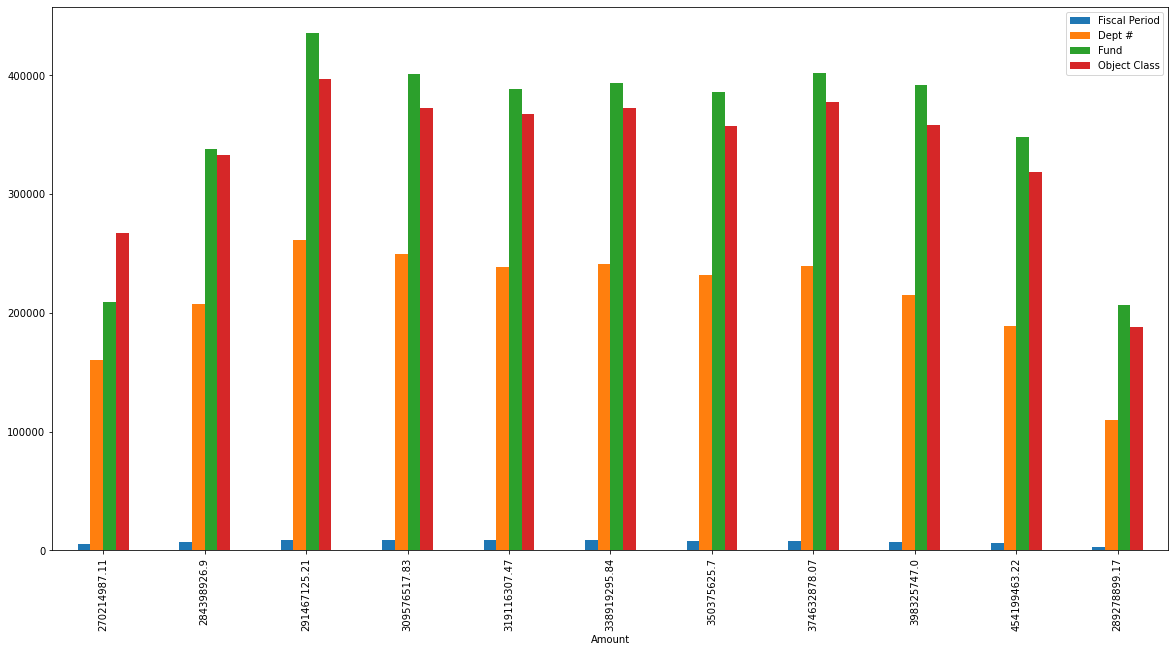

In [101]:
state_of_iowa_expenditures.sort_values("Budget FY").groupby("Budget FY").sum().plot.bar("Amount")

In [105]:
student_gender_common_institutes = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Student+Gender+for+Common+Institutions.csv")

student_gender_common_institutes.head()


,ID Gender,Gender,ID Year,Year,ID University,University,Completions,Slug University,Geography,ID Geography,Slug Geography
0,1,Men,2019,2019,153214,Des Moines Area Community College,1915,des-moines-area-community-college,Iowa,04000US19,iowa
1,1,Men,2019,2019,153603,Iowa State University,5012,iowa-state-university,Iowa,04000US19,iowa
2,1,Men,2019,2019,153658,University of Iowa,4271,university-of-iowa,Iowa,04000US19,iowa
3,1,Men,2019,2019,153737,Kirkwood Community College,1073,kirkwood-community-college,Iowa,04000US19,iowa
4,1,Men,2019,2019,154095,University of Northern Iowa,1203,university-of-northern-iowa,Iowa,04000US19,iowa


In [110]:
student_gender_common_institutes['ID Geography'].value_counts()

04000US19    80
Name: ID Geography, dtype: int64

In [107]:
student_race = pd.read_csv("https://sales-analysis.s3.amazonaws.com/Student+Race+and+Ethnicity.csv")
student_race.head()

,ID IPEDS Race,IPEDS Race,ID Year,Year,Completions,Geography,ID Geography,Slug Geography,share
0,asian,Asian,2019,2019,1448,Iowa,04000US19,iowa,0.027187
1,black,Black or African American,2019,2019,2543,Iowa,04000US19,iowa,0.047746
2,hawaiian,Native Hawaiian or Other Pacific Islanders,2019,2019,56,Iowa,04000US19,iowa,0.001051
3,hispanic,Hispanic or Latino,2019,2019,3342,Iowa,04000US19,iowa,0.062748
4,multiracial,Two or More Races,2019,2019,1224,Iowa,04000US19,iowa,0.022981


In [111]:
student_race['ID Geography'].value_counts()

04000US19    64
Name: ID Geography, dtype: int64

### Getting Coordinates for Columns Missing Location

 - Using <a href = "https://developer.mapquest.com/documentation/geocoding-api/address/get/'MapRequest">(Geocoding)</a>  and Json to parse the data


In [ ]:
missing_loc_df = pd.DataFrame(hyveeDF[hyveeDF.store_location.isna()][['address', 'zip_code','city']]
                              .drop_duplicates())


missing_loc_df  
# to minimize api requests, we created a dataframe that only contains observations with missing 'location' info.




In [ ]:
#from something.py import key

# key = 'MUdpFyIkOFhHG97P0JwvoE6ZUtPCKeHb'

In [ ]:
# def find_location(df):
    
#     '''
    
#     Finding location coordinates for all columns that are missing values for location.
    
#     df arguement that will be passed to the function is already the filtered dataframe
#     that contains the observations with null values to minimize amount of API requests (15,000/mo Limit).
    
#     '''

#     for i, j in df.iterrows():
#         location = str(df.at[i,'address']) + ',' + str(df.at[i,'zip_code']) + ',' + str(df.at[i,'city'])+', United States' 

#         params = {

#             "key": key,
#             "location": location
#         }


#         response = requests.get('http://www.mapquestapi.com/geocoding/v1/address', params=params)

        
#         data = json.loads(response.text) #Loading in json format 

#         lat = data['results'][0]['locations'][0]['latLng']['lat'] #based on json output
#         long = data['results'][0]['locations'][0]['latLng']['lng'] #based on json output

#         df.at[i,'long'] = long #adding information back to dataframe
#         df.at[i,'lat'] = lat   #adding information back to dataframe
        
#     return df

# find_location(missing_loc_df)

In [ ]:
hyveeDF.sample(10)

### Geolocation Analysis & Required Libraries
 - <b>folium</b>
     - Using leaflet.js for static maps.
 - <b>ipyleaflet</b>
     - using leaflet.js for inteactive maps.
 - <b>reportlab</b>
     - creating pdf reports.
 - <b>ipywidgets</b>
     - enabling widgets(customization) for jupyter notebook.
 - <b>geopandas</b>
     - makes working with geospatial data in python easier.

In [19]:
from ipyleaflet import Heatmap, Map, Marker, basemaps, GeoJSON, GeoData
import ipywidgets
import geopandas

In [28]:
!! jupyter --version


['Selected Jupyter core packages...',
 'IPython          : 7.29.0',
 'ipykernel        : 6.4.1',
 'ipywidgets       : 7.6.5',
 'jupyter_client   : 6.1.12',
 'jupyter_core     : 4.8.1',
 'jupyter_server   : 1.4.1',
 'jupyterlab       : 3.2.1',
 'nbclient         : 0.5.3',
 'nbconvert        : 6.1.0',
 'nbformat         : 5.1.3',
 'notebook         : 6.4.5',
 'qtconsole        : 5.1.1',
 'traitlets        : 5.1.0']

In [46]:
import sys
import types


In [ ]:
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
for i in imports():
    print(i)

In [79]:
# For loop takes too long for geospatial plotting, enter geopandas!

# center = [41.600361, -93.67322]
# zoom = 8

# m = Map(basemap=basemaps.Stamen.Terrain, center=center, zoom=zoom, layer = center)


# for cty, lat, long in hyveeDF[['city', 'lat', 'long']].values:
#     marker = Marker(location= (lat, long),draggable=False, title=cty, alt=cty)
#     m.add_layer(marker)
# m

In [131]:
hyveeDF.sample(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType
74580,INV-25793200002,2020-03-11,2529,hy-vee drugstore #4 / cedar rapids,4825 Johnson Ave NW,Cedar Rapids,52405.0,-91.73337 41.968343,57,LINN,1012200.0,Scotch Whiskies,260,DIAGEO AMERICAS,5345,Johnnie Walker Red,24,375,8.00,12.00,6,72.00,2.25,0.59,-91.73337,41.968343,Drug Store
103549,INV-25922200005,2020-03-16,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10807,Crown Royal Regal Apple,12,750,15.59,23.39,12,280.68,9.00,2.37,None,None,Supermarket
40219,INV-25693300058,2020-03-06,2644,hy-vee fort dodge wine and spirits,1511 2nd Ave North,Fort Dodge,50501.0,-94.177165 42.508344,94,WEBSTER,1022200.0,100% Agave Tequila,205,E & J Gallo Winery,87643,Familia Camarena Silver,12,750,12.50,18.75,12,225.00,9.00,2.37,-94.177165,42.508344,Liquor Store
159617,INV-26080100036,2020-03-24,2571,hy-vee food store #2 / waterloo,2181 Logan Ave,Waterloo,50703.0,-92.337583 42.530476,7,BLACK HAWK,1011100.0,Blended Whiskies,260,DIAGEO AMERICAS,25608,Seagrams 7 Crown,6,1750,12.96,19.44,6,116.64,10.50,2.77,-92.337583,42.530476,Supermarket
22783,INV-25617400090,2020-03-04,2625,hy-vee wine & spirits #2 / davenport,3301 W Kimberly Rd,Davenport,52804.0,None,82,SCOTT,1081300.0,American Cordials & Liqueur,305,Mhw LTD,77730,Travis Hasse's Cow Pie,6,750,7.94,11.91,3,35.73,2.25,0.59,None,None,Liquor Store


In [20]:
geo_df = geopandas.GeoDataFrame(hyveeDF, geometry=geopandas.points_from_xy(hyveeDF.long, hyveeDF.lat))

<AxesSubplot:>

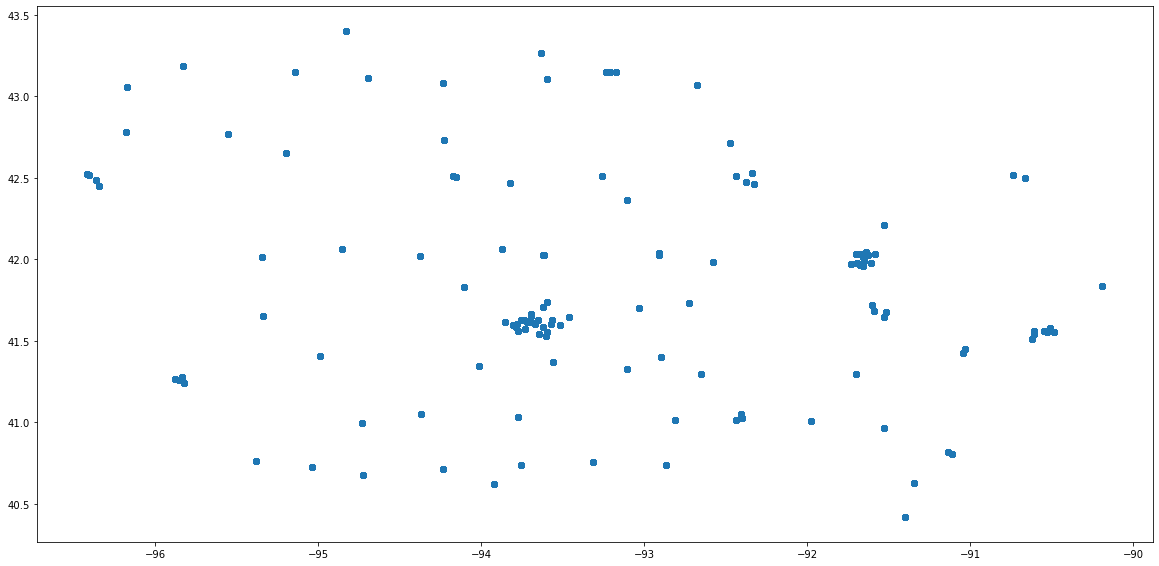

In [134]:
geo_df.plot()

In [ ]:
geo_df = geopandas.GeoDataFrame(hyveeDF, geometry=geopandas.points_from_xy(hyveeDF.long, hyveeDF.lat))
geo_df.date = geo_df.date.astype(str)


center = [41.600361, -93.67322]
zoom = 6

m = Map(basemap=basemaps.Stamen.Terrain, center=center, zoom=zoom)


geo_data = GeoData(geo_dataframe = geo_df)


m.add_layer(geo_data)
m

In [32]:
geo_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType,geometry
2,INV-25566200019,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.00,1.58,None,None,Supermarket,POINT EMPTY
3,INV-25574100031,2020-03-02,2662,hy-vee wine & spirits / muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.00,2.37,-91.04437,41.426615,Liquor Store,POINT (-91.04437 41.42661)
11,INV-25558700086,2020-03-02,2539,hy-vee food store / iowa falls,640 S. Oak,Iowa Falls,50126.0,-93.262364 42.508752,42,HARDIN,1012400.0,Irish Whiskies,395,PROXIMO,15830,Proper No. Twelve,12,750,14.00,21.00,1,21.00,0.75,0.19,-93.262364,42.508752,Supermarket,POINT (-93.26236 42.50875)
13,INV-25566100001,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,370,PERNOD RICARD USA,15856,Redbreast 12YR,6,750,33.48,50.22,12,602.64,9.00,2.37,None,None,Supermarket,POINT EMPTY
14,INV-25570000122,2020-03-02,2508,hy-vee food store #1 / cedar rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,-91.697941 41.97447,57,LINN,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,1,11.03,0.05,0.01,-91.697941,41.97447,Supermarket,POINT (-91.69794 41.97447)


In [48]:
mmm = Map(center=(41.600361, -93.67322), zoom=6,basemap=basemaps.Esri.WorldStreetMap )
gg = ggg[['city', 'long','lat']]

gdf = geopandas.GeoDataFrame(
    gg, geometry=geopandas.points_from_xy(gg.long, gg.lat))

geo_data = GeoData(geo_dataframe = gdf,
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')

mmm.add_layer(geo_data)
mmm

Map(center=[41.600361, -93.67322], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [23]:
df

,Conc,Longitude,Latitude,geometry
0,16.436796,7.429466,46.909576,POINT (7.42947 46.90958)
1,17.512836,7.429718,46.909973,POINT (7.42972 46.90997)
2,16.960194,7.429936,46.910265,POINT (7.42994 46.91027)
3,16.272084,7.430572,46.910803,POINT (7.43057 46.91080)
4,17.653313,7.430047,46.910290,POINT (7.43005 46.91029)
5,15.471370,7.429639,46.910117,POINT (7.42964 46.91012)
6,17.270974,7.429800,46.909457,POINT (7.42980 46.90946)
7,16.153730,7.430082,46.909791,POINT (7.43008 46.90979)
8,16.497707,7.430004,46.910069,POINT (7.43000 46.91007)
9,16.086056,7.430370,46.909724,POINT (7.43037 46.90972)


In [36]:
ggg = geo_df.drop_duplicates('store_number')

In [ ]:
mmm.add_

### Time Series Analysis & Required Libraries

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [150]:
center = [41.600361, -93.67322]
zoom = 6

m = Map(basemap=basemaps.Stamen.Terrain, center=center, zoom=zoom)
m

Map(center=[41.600361, -93.67322], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…